# 1. Power laws

In analyzing networks, it's inevitable to start exploring the distributions of descriptive statistics.
For example, what is the distribution of node degree in networks?

In doing so, a natural guess would probably be that this distribution is the normal/gaussian distribution.

<br>

<img src="https://drive.google.com/uc?export=view&id=16dAI74erncKBqYP6iKs9Y4Eydn0Xum0s"  width="600">

<br>

The normal distribution is called... normal, because it is ubiquitous across the natural sciences.
Without getting into too much detail, the reason for its ubiquity is well described by the central limit theorem.
- The central limit theorem tells us that if we take any sequence of small independent random quantities, then in the limit their sum (or average) will be distributed according to the normal distribution. In other words, any quantity that can be viewed as the sum of many small independent random eﬀects will be well-approximated by the normal distribution. Thus, for example, if one performs repeated measurements of a ﬁxed physical quantity, and if the variations in the measurements across trials are the cumulative result of many independent sources of error in each trial, then the distribution of measured values should be approximately normal.
- One the **most** important properties of the Gaussian distribution is that the proabability of having outlier observations (observations far away from the mean) decreases exponentially (very fast).


### Now let's see if the normal distribution is a good approximation for network phenomena!

## 1.1 Reading the graph

For this notebook we will first use Twitter data, provided at the following links:
 - http://bit.ly/twitterGraphComplete
 - http://bit.ly/twitterGraphIdsToUsernames 
 
You will have access to the following data files: 
1. **graph complete.txt** provides the edges of the graph in the form from → to. Each line is an edge where each node is separated by a space.
2. **ids to usernames.csv**: maps the integer ids given in the two data files to the actual Twitter usernames of the users in our dataset. There are two comma separated fields in this file: the integer id and the string username.

This data was collected in July 2014. We used four major Twitter accounts (Snapchat, Dropbox and two others) as seed nodes, collecting their most recent 4000 followers. We did the same for each of these followers. Then, for each of these accounts, we collected all the accounts they follow. Your data set includes 59,974 Twitter users (nodes) and 73,277 follower relationships (edges).


## 1.2   Compute the follower distribution

Plot the distribution of the of number of followers of each user in our dataset (x-axis number
of followers, y-axis number of nodes). Please note, that for each edge, user a is said to be a
follower of user b if there is some edge a → b.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# use a dictionary with keys==ids and values==usernames
with open('files/graph_ids_to_usernames.csv', mode='r', encoding='utf-8' ) as f:
    temp = f.read().split('\n')[1:-1]
idToUser=dict()
for k in temp:
    idToUser[int(k.split(',')[0])] = k.split(',')[1]
    
# use a dictionary with keys==ids and values==numberOfFollowers
with open('files/graph_complete.txt', mode='r', encoding='utf-8' ) as f:
    temp = f.read().split('\n')[:-1]
followers=dict()
for entry in temp:
    k = int(entry.split()[1])
    if k in followers:
        followers[k]+=1
    else:
        followers[k]=1
        
#every account without a follower is added with 0 followers
for k in idToUser:
    if k not in followers:
        followers[k]=0

#missing IDs
for k in followers:
    if k not in idToUser:
        idToUser[k]='randomId'+str(k)
        


## 1.3.1 Visualize the follower distribution

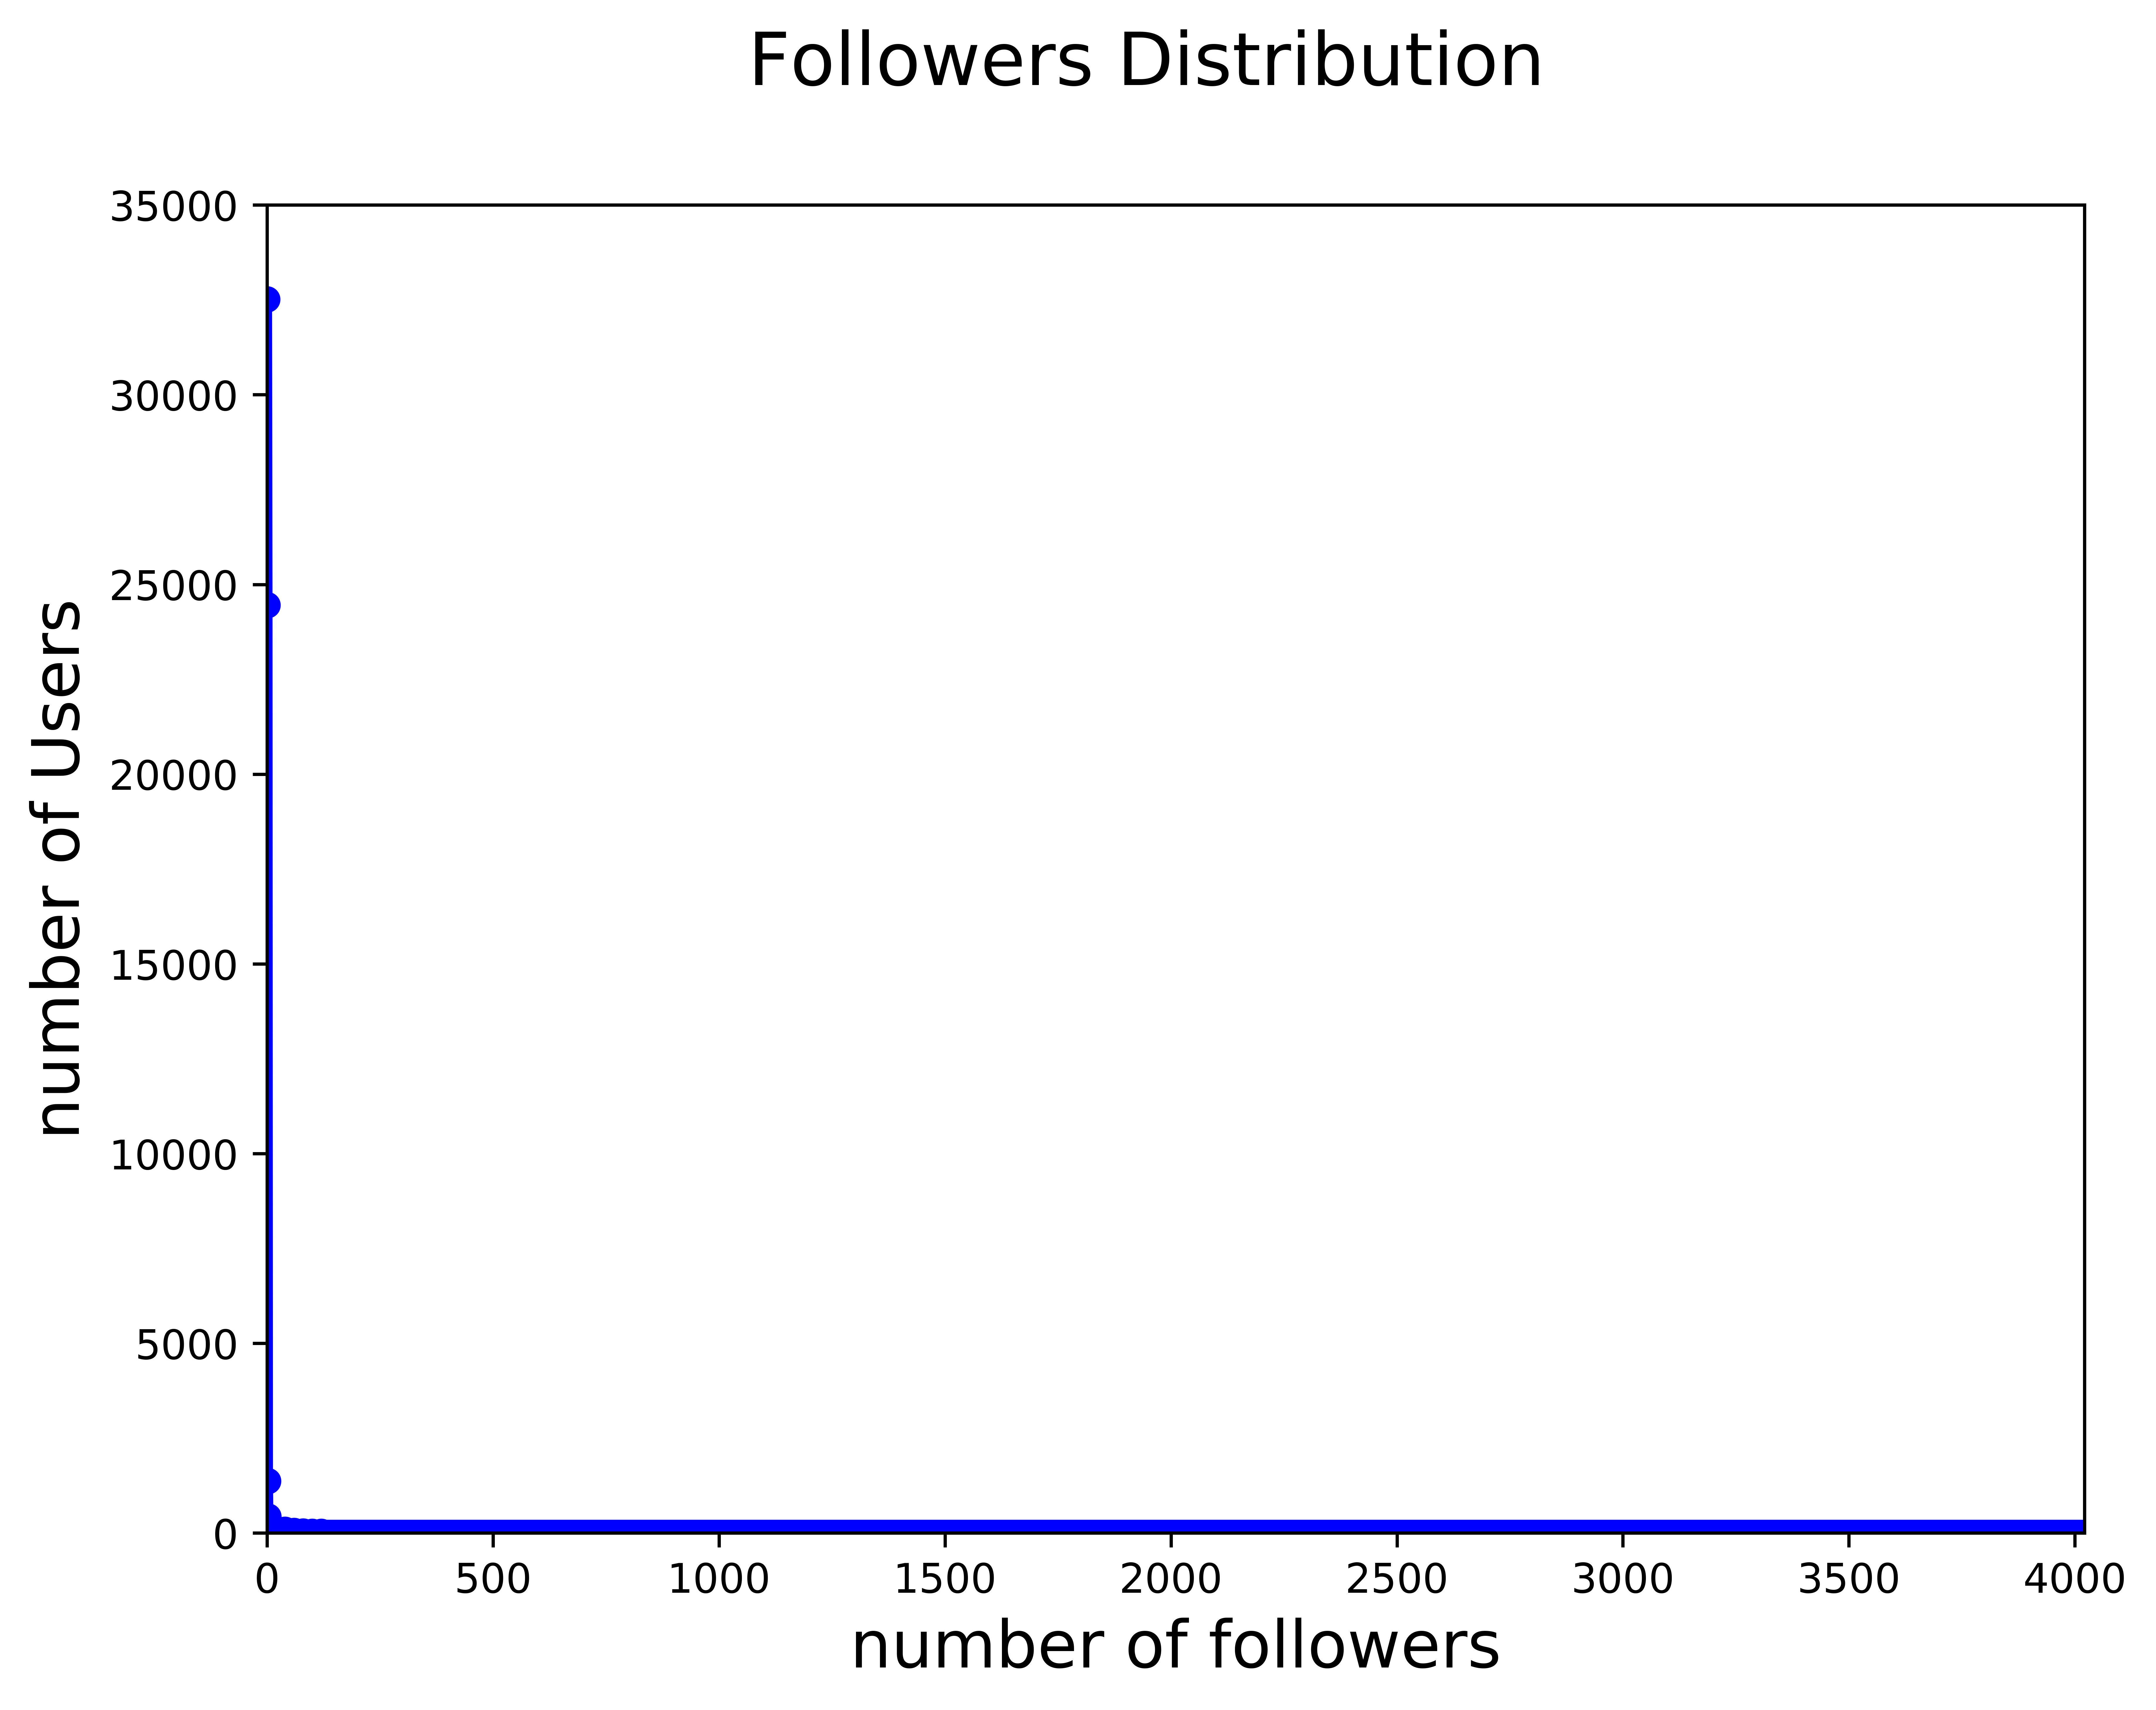

In [2]:


# get the in degree Distr.
maxx = max(list(followers.values()))
inDegree= {k:0 for k in range(0,maxx+1) }
for k in followers:
    inDegree[ followers[k] ] +=1
    
# plot without log scale
x = [k for k in range(0,maxx+1)]
y = [inDegree[k] for k in range(0,maxx+1)]
plt.figure(figsize=(8,6), dpi=1000)
plt.subplot(111)
plt.scatter(x, y, color="blue", linewidth=0.5, linestyle='-')
plt.plot(x, y, color="blue", linewidth=2.5, linestyle='-', label='line 1')
plt.xlim(0,maxx+1)
plt.ylim(0,35000)
plt.suptitle('Followers Distribution', fontsize=18)
plt.xlabel('number of followers', fontsize=16)
plt.ylabel('number of Users', fontsize=16)
plt.savefig('images/followersDistribution.png',dpi=72)
plt.show()

## 1.3.2 Nicely visualizing the follower distribution

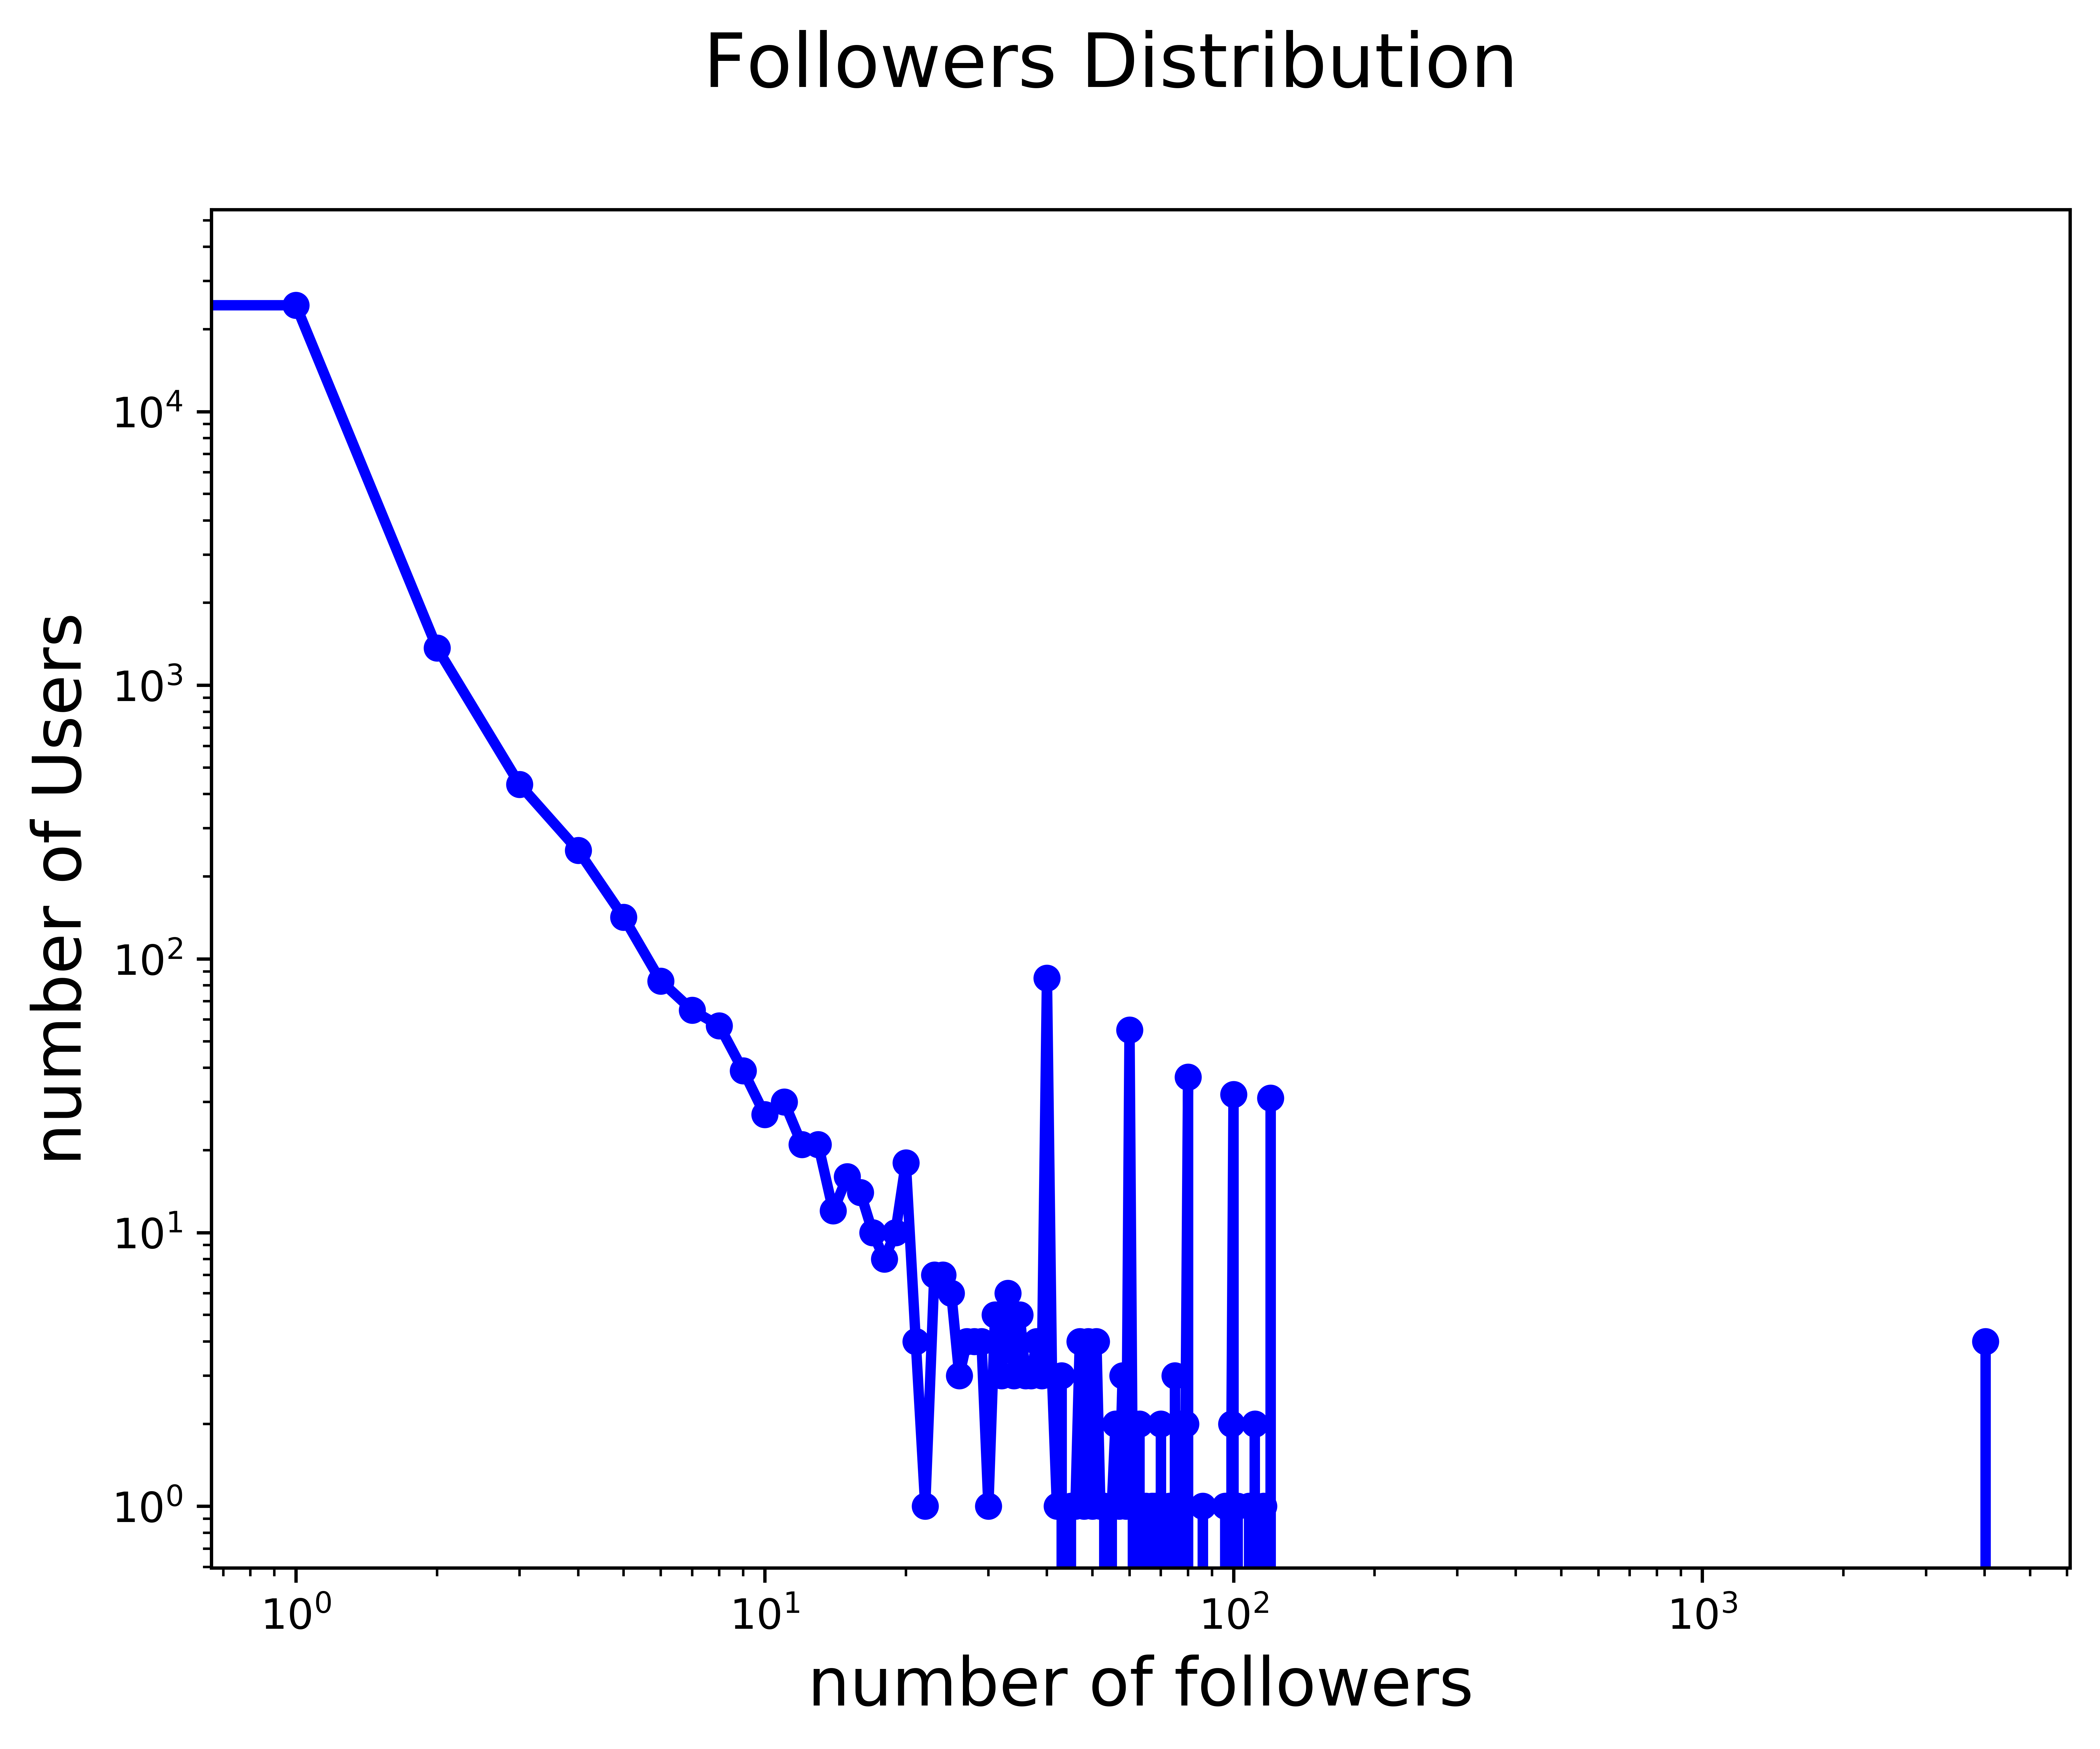

In [3]:
plt.figure(figsize=(8,6), dpi=1000)
plt.subplot(111)
plt.scatter(x, y, color="blue", linewidth=0.5, linestyle='-')
plt.plot(x, y, color="blue", linewidth=2.5, linestyle='-', label='line 1')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0,maxx+1)
#plt.ylim(0,35000)
plt.suptitle('Followers Distribution', fontsize=18)
plt.xlabel('number of followers', fontsize=16)
plt.ylabel('number of Users', fontsize=16)
plt.savefig('images/followersDistributionLog.png',dpi=72)
plt.show()


In [4]:
# Top users
temp = [[idToUser[k],followers[k]] for k in followers]
sorted(temp, key = lambda x: x[1])[-50:]

[['MaricelaSGarcia', 100],
 ['LuArDanni', 100],
 ['jodiieAnnex', 100],
 ['hesperfection', 100],
 ['haley_harloff', 100],
 ['adamzfurniture', 100],
 ['Tommac1602', 100],
 ['ArgirisKarvelas', 100],
 ['ComEstadios', 100],
 ['thetli8', 100],
 ['djMikeHawkins', 102],
 ['sammeyer98', 108],
 ['namfow', 111],
 ['randomId39876', 111],
 ['someUser', 116],
 ['elcapimar', 120],
 ['PetjaSairanen', 120],
 ['Asit_Tewari', 120],
 ['miklit23', 120],
 ['SongsThisWeek', 120],
 ['MarvinaPete', 120],
 ['AminGa123', 120],
 ['BOXFEDmusic', 120],
 ['Enzolibo', 120],
 ['kjrasing', 120],
 ['Nique_Kee', 120],
 ['GOvOSE', 120],
 ['Massy_DeeJay', 120],
 ['__rossgeller', 120],
 ['djshawnjay', 120],
 ['JayFulk', 120],
 ['jesse_jamal', 120],
 ['tha__symbolic', 120],
 ['deephousCo', 120],
 ['hannabaldovino', 120],
 ['Can1ffs_bae', 120],
 ['091Jacko', 120],
 ['Kill_Joy7', 120],
 ['jillian_1015', 120],
 ['sydneyhbrodsky', 120],
 ['byers_alec', 120],
 ['glasstablegirlz', 120],
 ['mcclainxkylie', 120],
 ['JohnIrons95', 12

In [6]:
# average and standard deviation

temp = [followers[k] for k in followers]
print(" average is " + str(np.mean(temp)) + "followers")
print(" std is "     + str(np.std(temp))  + "followers")


 average is 1.2218331582545479followers
 std is 33.25395265141926followers


## 1.4 Why power laws?

The above analysis suggests that the normal distribution is not a good approximation for some phenomena we see in networks. One possible reason lies in that the CLT---the process that gives rise to the normal distribution---is based on *independent* draws from some distribution. However, once we change this independence assuption this result breaks down

Some cases where the independence assumption breaks down is the "rich-get-richer" phenomena. 
- For example, if you base your decision on who to follow (or which post to like) on the previous number of likes, then the outcome distribution of followers (likes) will begin to look not like a normal distribution, but rather like a power law.
- In power law distributions, the probability of having outliers decreases not exponentially, but proportional to 1/k^2 (or some other exponent). 
- Why is this so diﬀerent from the normal distribution? The crucial point is that 1/k^2 decreases much more slowly as k increases, so pages with very large numbers of in-links are much more common than we’d expect with a normal distribution. For example, 1/k^2 is only one in a million for k = 1000, while an exponentially decaying function like 2^−k is unimaginably tiny for k = 1000. A function that decreases as k to some ﬁxed power, such as 1/k^2 in the present case, is called a power law; when used to measure the fraction of items having value k, it says, qualitatively, that it’s possible to see very large values of k


In the case of power laws, previously "informative" statistics---such as the mean and the standard deviation---now become far less informative.

If you're interested in such phenomena---and the inequality that they seemingly create---Chapter 18 from the "Networks, crowds, and markets" book offers a good introduction.
